12/12 [==============================] - 0s 3ms/step
Predicted production for production_tomato from 2024 to 2030:
   Year    production
0  2024  22403.777344
1  2025  22743.109375
2  2026  23118.921875
3  2027  23471.027344
4  2028  23866.802734
5  2029  24110.050781
6  2030  24399.855469
Predicted production for production_okra from 2024 to 2030:
   Year   production
0  2024  7215.580566
1  2025  7349.520020
2  2026  7502.748047
3  2027  7655.514648
4  2028  7829.219727
5  2029  7959.591797
6  2030  8110.864258
Predicted production for production_cauliflower from 2024 to 2030:
   Year    production
0  2024  10051.646484
1  2025  10261.572266
2  2026  10498.369141
3  2027  10734.556641
4  2028  11000.136719
5  2029  11204.964844
6  2030  11439.116211
Predicted production for production_peas from 2024 to 2030:
   Year   production
0  2024  7172.178223
1  2025  7529.887695
2  2026  7915.684570
3  2027  8309.221680
4  2028  8733.442383
5  2029  9116.128906
6  2030  9527.860352
Predicted 

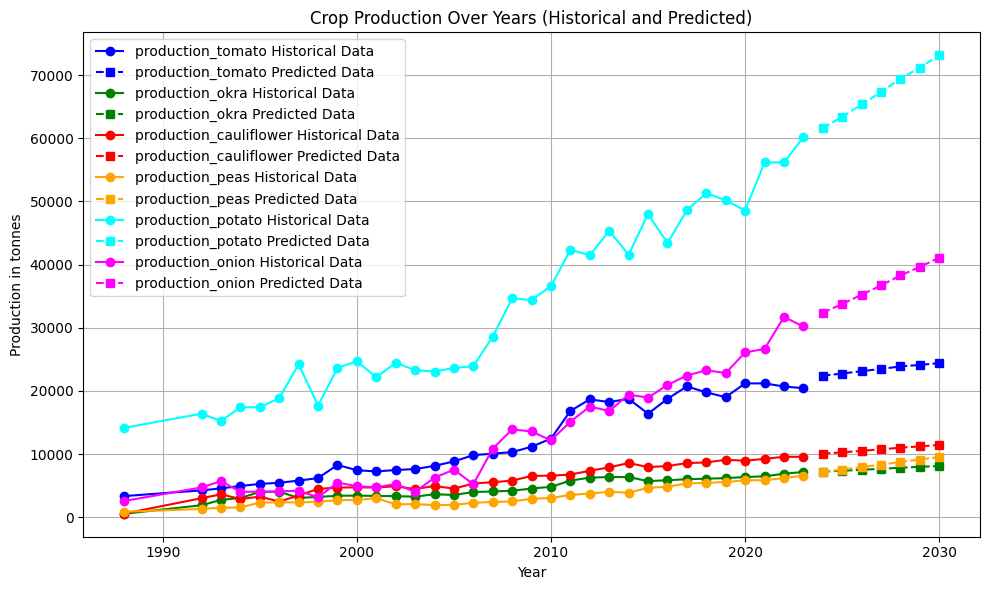

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the data for all crops
annual_data = {
    'Year': [1988, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'production_tomato': [
        3330.5, 4243.4, 4549.6, 4934, 5261.3, 5442, 5787.8, 6183.7, 8271.8, 7426.8,
        7242.4, 7462.3, 7616.7, 8125.6, 8825.4, 9820.4, 10055, 10303, 11149, 12433.2,
        16826, 18653.3, 18226.6, 18735.9, 16385, 18732, 20708, 19759, 19007, 21187,
        21180.5, 20694.3, 20425.3
    ],
    'production_okra': [
        530.5, 1886.5, 2737.8, 3029.4, 3988.8, 4031.8, 3040.1, 3210.9, 3380.3,
        3419.1, 3351.8, 3324.7, 3244.5, 3631.4, 3512.4, 3974.6, 4070, 4179,
        4528, 4803.3, 5784, 6259.2, 6350.3, 6346.4, 5708.7, 5849, 6003,
        6095, 6176, 6355, 6465.6, 6873.3, 7157.6
    ],
    'production_cauliflower':[
        558.6, 2998.1, 3612.2, 2872.9, 3244.1, 2474, 3419, 4471, 4690.6, 4717.8,
        4695.8, 4890.5, 4444.1, 4940.2, 4514.8, 5323.1, 5538, 5777, 6532, 6569,
        6745, 7348.9, 7886.7, 8573.3, 7925.8, 8090, 8557, 8668, 9083, 8941,
        9224.7, 9566.2, 9548
    ],
    'production_peas': [
        851.6, 1296, 1491.9, 1528.4, 2306.3, 2341.3, 2339.2, 2422, 2706.4, 2712,
        3007.6, 2038.2, 2061.8, 1901.2, 1944.8, 2270, 2402, 2491, 2916, 3029.4,
        3517, 3744.8, 4006.2, 3868.6, 4651.5, 4811, 5345, 5422, 5562, 5848,
        5845.9, 6182.4, 6592
    ],
    'production_potato': [
        14138, 16387.9, 15230.3, 17392.4, 17401.3, 18843.3, 24215.9, 17648.1,
        23610.7, 24713.2, 22142.7, 24456, 23268.7, 23060.1, 23631.3, 23905.3,
        28599.5, 34658.3, 34390.9, 36577.3, 42339.4, 41482.8, 45343.6, 41555.4,
        48009.2, 43417, 48605, 51310, 50190, 48562, 56172.5, 56175.8, 60141.6
    ],
    'production_onion': [
        2554, 4705.8, 5704.7, 4006.4, 4036.1, 4080, 4180, 3140, 5466.7, 4899.5,
        4721.1, 5252.1, 3993.4, 6267.6, 7515.7, 5206.7, 10847.4, 13900.4, 13564.5,
        12158.8, 15117.7, 17511.1, 16813, 19401.7, 18927.4, 20931, 22427, 23262,
        22819, 26091, 26641, 31687.2, 30207.9
    ]
}

# Function to check if a year is leap year
def is_leap_year(year):
    if year % 4 == 0:
        if year % 100 == 0:
            if year % 400 == 0:
                return True
            else:
                return False
        else:
            return True
    else:
        return False

# Function to generate day-wise data for a given crop
def generate_daywise_data(years, production_areas):
    day_data = []
    for i in range(len(years)):
        year = years[i]
        days_in_year = 366 if is_leap_year(year) else 365
        production_per_day_area = production_areas[i] / days_in_year

        for day in range(1, days_in_year + 1):
            day_data.append({
                'Year': year,
                'DayOfYear': day,
                'production': production_per_day_area
            })
    return day_data

# Dictionary to store day-wise data for all crops
all_crop_day_data = {}

# Generate day-wise data for each crop
for crop_name in annual_data.keys():
    if crop_name == 'Year':
        continue  # Skip the 'Year' key

    crop_years = annual_data['Year']
    crop_areas = annual_data[crop_name]
    crop_day_data = generate_daywise_data(crop_years, crop_areas)

    # Store day-wise data for the current crop
    all_crop_day_data[crop_name] = pd.DataFrame(crop_day_data)

# Initialize variables to store predicted values for each crop
predicted_values = {}

# Example: Loop through each crop to train and predict
for crop_name in all_crop_day_data.keys():
    if crop_name == 'Year':
        continue  # Skip the 'Year' key

    # Extract day-wise data for the current crop
    crop_data = all_crop_day_data[crop_name]

    # Extract features and target for LSTM model
    X = crop_data[['Year', 'DayOfYear']].values
    y = crop_data['production'].values

    # Normalize features
    scaler_X = MinMaxScaler(feature_range=(0, 1))
    scaler_y = MinMaxScaler(feature_range=(0, 1))

    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

    # Reshape features for LSTM input: (samples, time steps, features)
    X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

    # Define LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Fit model for production
    model.fit(X_lstm, y_scaled, epochs=50, batch_size=72, verbose=0)

    # Function to forecast using LSTM model
    def forecast_lstm(model, X_scaled, scaler):
        # Reshape input for LSTM model
        X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
        # Make forecast
        forecast_scaled = model.predict(X_lstm)
        forecast = scaler.inverse_transform(forecast_scaled)
        return forecast

    # Prepare input for forecasting (future years)
    years_forecast = range(2024, 2031)  # Forecasting from 2024 to 2030
    forecast_data = []

    for year in years_forecast:
        days_in_year = 366 if is_leap_year(year) else 365
        X_forecast = np.array([[year, day] for day in range(1, days_in_year + 1)])
        X_forecast_scaled = scaler_X.transform(X_forecast)

        # Make forecasts for production
        forecast_scaled = forecast_lstm(model, X_forecast_scaled, scaler_y)
        forecast_annual = np.sum(forecast_scaled)  # Summing up daily forecasts to annual

        # Store forecasted data
        forecast_data.append({
            'Year': year,
            'production': forecast_annual
        })

    # Store predicted values for the current crop
    predicted_values[crop_name] = forecast_data

# Example: Print or display the predicted values for each crop
for crop_name, data in predicted_values.items():
    print(f"Predicted production for {crop_name} from 2024 to 2030:")
    print(pd.DataFrame(data))

# Plotting the historical and predicted data
plt.figure(figsize=(10, 6))

# Define a color palette with unique colors for each crop
colors = ['blue', 'green', 'red', 'orange', 'cyan', 'magenta']

# Iterate over each crop name and its predicted values
for i, crop_name in enumerate(predicted_values.keys()):
    if crop_name == 'Year':
        continue  # Skip the 'Year' key

    # Extract historical data up to the length of the available data in annual_data
    historical_data = annual_data[crop_name][:len(annual_data['Year'])]

    # Plotting historical data
    years = annual_data['Year']
    plt.plot(years, historical_data, marker='o', color=colors[i], label=f'{crop_name} Historical Data')

    # Plotting predicted data
    years_forecast = [year['Year'] for year in predicted_values[crop_name]]
    predicted_data = [year['production'] for year in predicted_values[crop_name]]
    plt.plot(years_forecast, predicted_data, marker='s', linestyle='--', color=colors[i], label=f'{crop_name} Predicted Data')

plt.xlabel('Year')
plt.ylabel('Production in tonnes')
plt.title('Crop Production Over Years (Historical and Predicted)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
